In [296]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.model_selection import GridSearchCV,train_test_split,GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from itertools import combinations
from feature_selection import feature_selection
import watermark
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
%load_ext watermark
%watermark -n -u -v -iv -w -a sushmit86@gmail.com

Author: sushmit86@gmail.com

Last updated: Tue Apr 06 2021

Python implementation: CPython
Python version       : 3.8.2
IPython version      : 7.22.0

watermark  : 2.1.0
statsmodels: 0.12.2
numpy      : 1.19.2
matplotlib : 3.3.4
pandas     : 1.2.3
seaborn    : 0.11.1

Watermark: 2.1.0



# Lab1

In [2]:
df_hitters = pd.read_csv('Data/Hitters.csv')
df_hitters = df_hitters.iloc[:,1:]
display(df_hitters.shape)
display(df_hitters.head())
df_hitters_to_work = df_hitters.copy()


(322, 19)

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Data Manipulation

In [3]:
df_hitters_to_work = df_hitters.copy()
df_hitters_to_work.dropna(inplace= True)
display(df_hitters_to_work.info())

y = df_hitters_to_work.Salary

df_hitters_to_work.drop(['Salary'],axis = 1, inplace= True) 
numeric_features = list(df_hitters_to_work.dtypes[df_hitters_to_work.dtypes != 'object'].index)
#scaler = StandardScaler()
#df_hitters_to_work.loc[:,numeric_features] = scaler.fit_transform(df_hitters_to_work.loc[:,numeric_features])
X= pd.get_dummies(df_hitters_to_work)
X.drop(['League_A','Division_E','NewLeague_A'],axis=1,inplace= True)
features = list(X.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hits       263 non-null    int64  
 1   HmRun      263 non-null    int64  
 2   Runs       263 non-null    int64  
 3   RBI        263 non-null    int64  
 4   Walks      263 non-null    int64  
 5   Years      263 non-null    int64  
 6   CAtBat     263 non-null    int64  
 7   CHits      263 non-null    int64  
 8   CHmRun     263 non-null    int64  
 9   CRuns      263 non-null    int64  
 10  CRBI       263 non-null    int64  
 11  CWalks     263 non-null    int64  
 12  League     263 non-null    object 
 13  Division   263 non-null    object 
 14  PutOuts    263 non-null    int64  
 15  Assists    263 non-null    int64  
 16  Errors     263 non-null    int64  
 17  Salary     263 non-null    float64
 18  NewLeague  263 non-null    object 
dtypes: float64(1), int64(15), object(3)
memory usage: 

None

<AxesSubplot:>

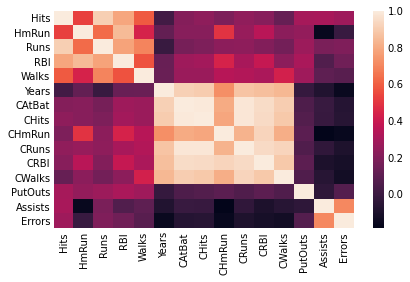

In [4]:
sns.heatmap(X.loc[:,numeric_features].corr())

## Best Subset

In [5]:
feature_select = feature_selection(X,y)
result_dict_best_subset = feature_select.best_subset_selection(num_features=3)
result_dict_best_subset = feature_select.select_best_model()

Done for 0 features


In [6]:
df_results = pd.DataFrame(result_dict_best_subset).T
df_results

,feature,mse,r2,aic,bic,adjusted_r2,params
0,(),202734.269158,0,0,0,0,NaN
1,"(CRBI,)",17139433.533604,0.32145,3862.139307,3869.283615,0.31885,const 274.580386 CRBI 0.790954 dtype:...
2,"(Hits, CRBI)",11336276.449136,0.425224,3820.487305,3831.203767,0.420802,const -47.955902 Hits 3.300845 CRBI ...
3,"(Hits, CRBI, PutOuts)",8023271.977593,0.451429,3810.21444,3824.503056,0.445075,const -71.459220 Hits 2.803816 CRBI...


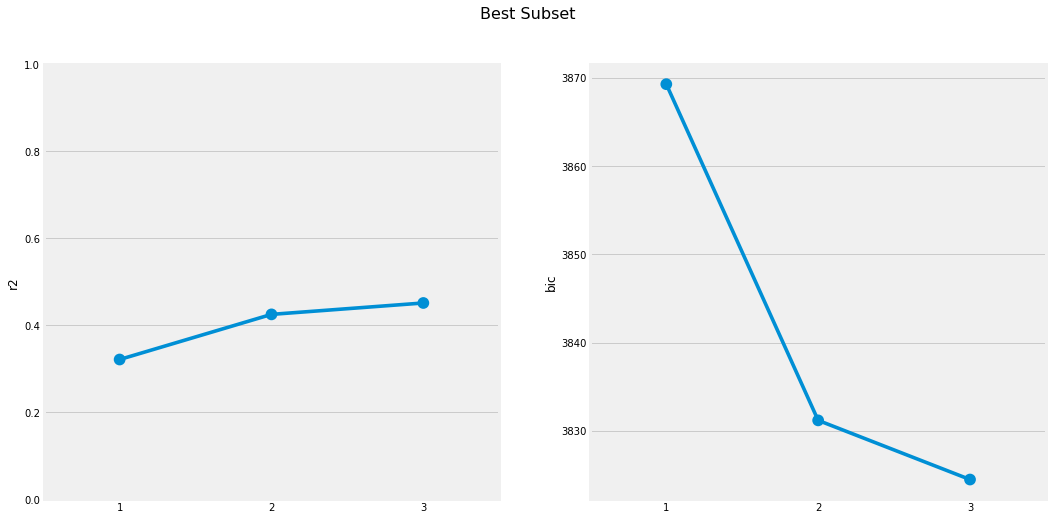

In [7]:
fig,axs = plt.subplots(1,2,figsize = (16,8))
fig.suptitle('Best Subset', fontsize=16)
sns.pointplot(x= df_results.index[1:].values, y=df_results.r2[1:],ax= axs[0],scale = 0.5)
axs[0].set_ylim([0,1])
sns.pointplot(x= df_results.index[1:].values, y=df_results.bic[1:],ax= axs[1],scale = 0.5)

plt.show()

## Forward Stepwise

In [8]:
feature_select = feature_selection(X,y)
result_dict = feature_select.forward_stepwise_selection(num_features=8)
result_dict = feature_select.select_best_model('forward_stepwise')
df_results = pd.DataFrame(result_dict).T
df_results

,feature,mse,r2,aic,bic,adjusted_r2,params
0,(),202734.269158,0,0,0,0,NaN
1,"(CRBI,)",17139433.533604,0.32145,3862.139307,3869.283615,0.31885,const 274.580386 CRBI 0.790954 dtype:...
2,"(CRBI, Hits)",11336276.449136,0.425224,3820.487305,3831.203767,0.420802,const -47.955902 CRBI 0.689899 Hits ...
3,"(CRBI, Hits, PutOuts)",8023271.977593,0.451429,3810.21444,3824.503056,0.445075,const -71.459220 CRBI 0.682528 Hits...
4,"(CRBI, Hits, PutOuts, Division_W)",6337065.243207,0.475407,3800.460294,3818.321064,0.467273,const 13.923104 CRBI 0.681...
5,"(CRBI, Hits, PutOuts, Division_W, Walks)",5167969.046315,0.484626,3797.797002,3819.229926,0.4746,const -7.656382 CRBI 0.649...
6,"(CRBI, Hits, PutOuts, Division_W, Walks, CRuns)",4329995.856285,0.487254,3798.452408,3823.457486,0.475237,const -13.495642 CRBI 0.439...
7,"(CRBI, Hits, PutOuts, Division_W, Walks, CRuns...",3808680.950233,0.500023,3793.820334,3822.397566,0.486298,const 5.245872 CRBI 0.498...
8,"(CRBI, Hits, PutOuts, Division_W, Walks, CRuns...",3394885.103958,0.509369,3790.857648,3823.007034,0.493916,const 46.425854 CRBI 0.660...


In [9]:
df_results.params[7]

const           5.245872
CRBI            0.498391
Hits            0.979411
PutOuts         0.263553
Division_W   -138.317802
Walks           4.775595
CRuns           0.655526
CWalks         -0.687310
dtype: float64

## Backward Stepwise

In [10]:
feature_select = feature_selection(X,y)
result_dict = feature_select.backward_stepwise_selection(num_features=7)
result_dict = feature_select.select_best_model('backward_stepwise')
df_results = pd.DataFrame(result_dict).T
df_results

,feature,mse,r2,aic,bic,adjusted_r2,params
18,"(Hits, HmRun, Runs, RBI, Walks, Years, CAtBat,...",1563729.200822,0.527899,3800.731887,3868.602813,0.493072,const 67.926910 Hits 2.1...
17,"(Hits, HmRun, Runs, RBI, Walks, Years, CAtBat,...",1655671.407808,0.527886,3798.739322,3863.038095,0.495127,const 67.929700 Hits 2.1...
16,"(Hits, HmRun, Runs, RBI, Walks, CAtBat, CHits,...",1758809.543582,0.527784,3796.796374,3857.522993,0.49707,const 79.332801 Hits 2.1...
15,"(Hits, HmRun, Runs, RBI, Walks, CAtBat, CHits,...",1873378.556173,0.527028,3795.216726,3852.371191,0.498305,const 78.198162 Hits 2.105...
14,"(Hits, HmRun, RBI, Walks, CAtBat, CHits, CRuns...",2003966.904297,0.526182,3793.687083,3847.269393,0.499434,const 80.263140 Hits 1.277...
13,"(Hits, RBI, Walks, CAtBat, CHits, CRuns, CRBI,...",2156265.15604,0.52573,3791.937742,3841.947898,0.500969,const 78.062435 Hits 1.181...
12,"(Hits, Walks, CAtBat, CHits, CRuns, CRBI, CWal...",2334219.753482,0.52534,3790.154084,3836.592086,0.502556,const 77.119894 Hits 0.887...
11,"(Hits, Walks, CAtBat, CHits, CRuns, CRBI, CWal...",2535190.20824,0.523022,3789.43481,3832.300658,0.502119,const 104.180440 Hits 0.745...
10,"(Walks, CAtBat, CHits, CRuns, CRBI, CWalks, Pu...",2777848.928905,0.520986,3788.555514,3827.849208,0.501977,const 132.750361 Walks 5.018...
9,"(Walks, CAtBat, CHits, CRuns, CRBI, CWalks, Pu...",3072656.427941,0.518649,3787.83525,3823.556791,0.501526,const 112.042008 Walks 4.973...


In [11]:
df_results.params[7]

const         119.930946
Walks           5.749230
CAtBat         -0.348335
CHits           1.340935
CRBI            0.696613
CWalks         -0.349672
PutOuts         0.237840
Division_W   -140.090057
dtype: float64

# Cross Validation and Regularization

In [129]:
df_hitters = pd.read_csv('Data/Hitters.csv')
display(df_hitters.shape)
display(df_hitters.head())
df_hitters_to_work = df_hitters.copy()
display(df_hitters_to_work.info())
df_hitters_to_work.dropna(inplace= True)
display(df_hitters_to_work.info())

df_hitters_to_work = pd.get_dummies(df_hitters_to_work)
df_hitters_to_work.drop(['League_A','Division_E','NewLeague_A'],axis=1,inplace= True)


(322, 20)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

None

In [130]:
df_hitters_to_work.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


## Ridge Regression

In [216]:
features_to_select = list(df_hitters_to_work.columns)
features_to_select.remove('Salary')
X = df_hitters_to_work.loc[:,features_to_select]
y = df_hitters_to_work.Salary

In [215]:
# def islr_standardize(X):
#     return (X- np.mean(X))/np.std(X)
# islr_transformer = FunctionTransformer(islr_standardize)
# X_std = pd.DataFrame(islr_transformer.transform(X),columns= X.columns)

In [249]:
alphas = 10** np.linspace(10,-2,100)
coefs = []
for _alpha in alphas:
    ridge = Ridge(normalize=True, random_state=1,alpha = _alpha)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
coefs=np.array(coefs)

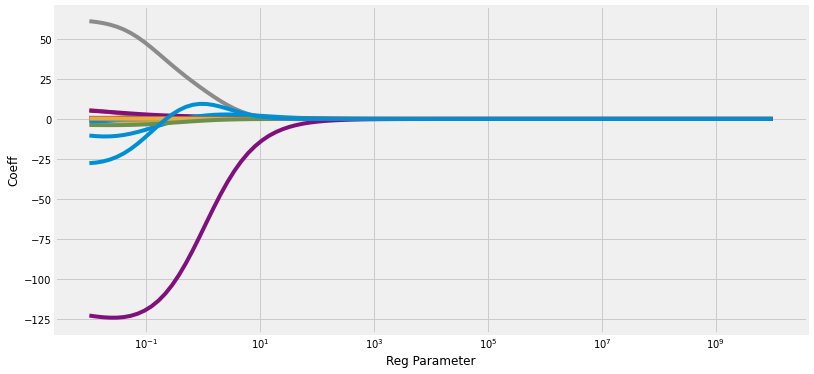

In [252]:
fig,axs = plt.subplots(1,1,figsize = (12,6))
for i in range(19):
    sns.lineplot(x= alphas,y = coefs[:,i], ax = axs)
axs.set_xscale('log')
axs.set_xlabel('Reg Parameter')
axs.set_ylabel('Coeff')
plt.show()

In [269]:
train,test = train_test_split(df_hitters_to_work,test_size=0.5,random_state=1)
X_train = train.loc[:,features_to_select]
y_train = train.Salary
X_test = test.loc[:,features_to_select]
y_test = test.Salary

In [272]:
ridge2 = Ridge(normalize=True,alpha = 4)
ridge2.fit(X_train,y_train)
mean_squared_error(y_test,ridge2.predict(X_test))

106216.52238005561

In [273]:
ridge2 = Ridge(normalize=True,alpha = 10**10)
ridge2.fit(X_train,y_train)
mean_squared_error(y_test,ridge2.predict(X_test))

172862.23580379886

In [295]:
model = RidgeCV(normalize=True,alphas = alphas,scoring='neg_mean_squared_error',cv=5)
model.fit(X_train,y_train)
model.best_score_

-137818.7045596281

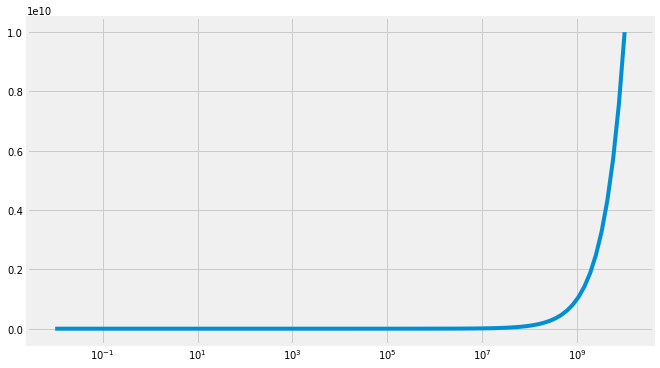

In [283]:
fig,axs = plt.subplots(1,1, figsize = (10,6))
axs.set_xscale('log')
plt.show()